In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('UpdatedResumeDataset.csv')

In [9]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [10]:
df.shape

(962, 2)

In [11]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

ValueError: 'locs' must be 1D with shape (N,), but your input has shape ()

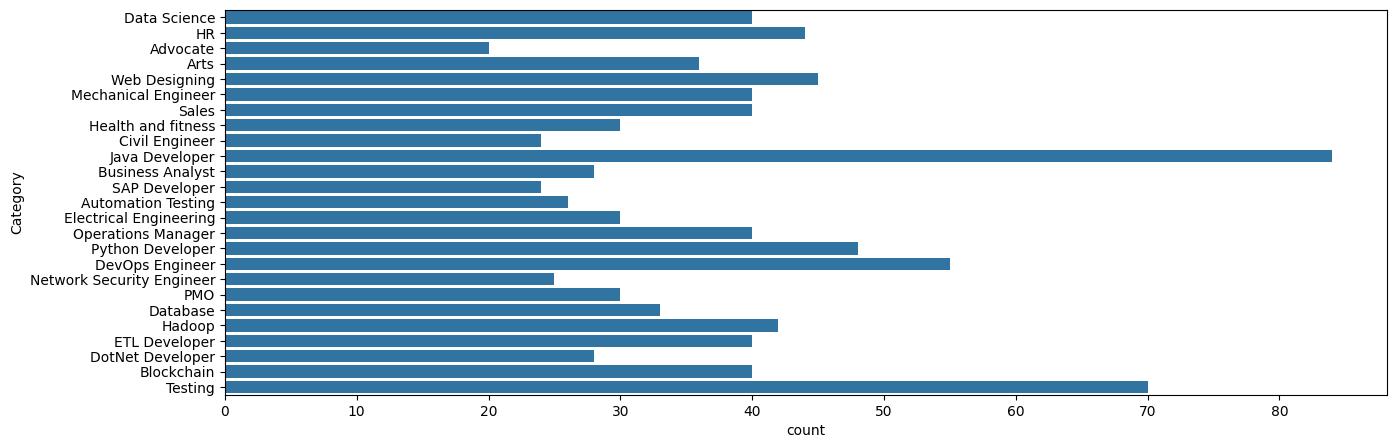

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(round)
plt.show()

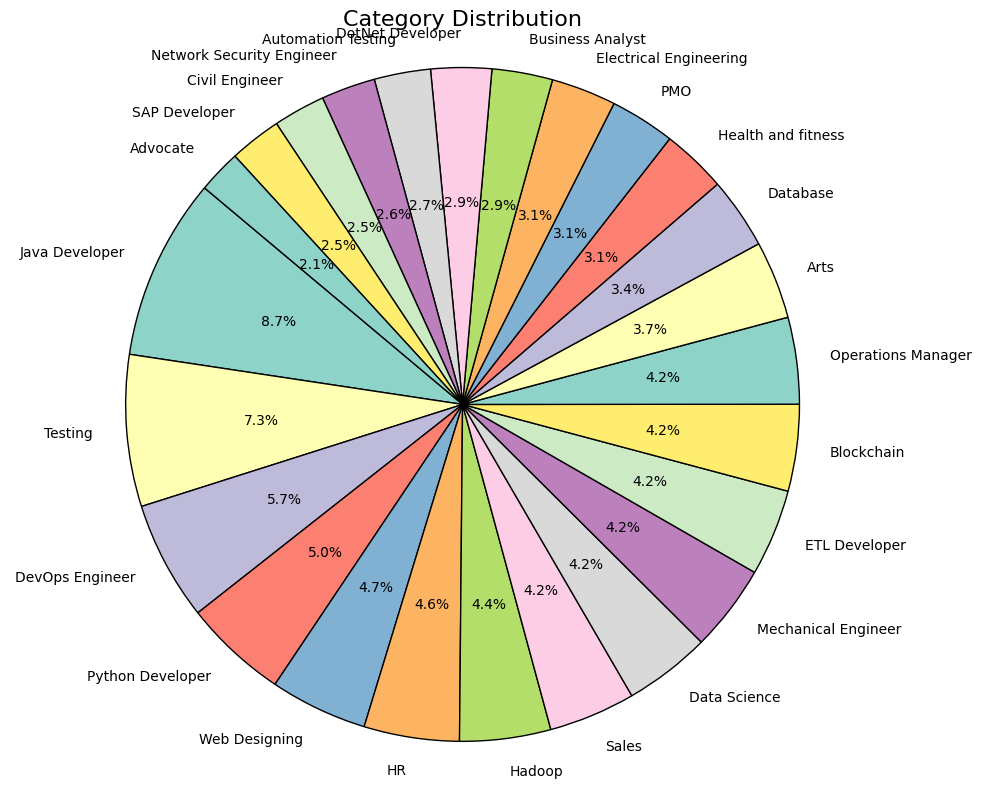

In [17]:


# Count categories
counts = df['Category'].value_counts()
labels = counts.index  # Use the same order as counts

# Plot
plt.figure(figsize=(10, 8))  # Make the pie chart bigger
colors = plt.cm.Set3.colors  # Use a nice color map

plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',        # Show percentage with 1 decimal
    startangle=140,           # Start angle for better layout
    colors=colors,            # Apply color map
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Make edges visible
)

plt.title('Category Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio makes it a circle
plt.tight_layout()
plt.show()


In [18]:
#balncing the classes 
# Check the original category distribution
print("Original Category Distribution:")
print(df['Category'].value_counts())

# Get the largest category size (i.e., the category with the maximum number of entries)
max_size = df['Category'].value_counts().max()

# Perform oversampling
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

# Shuffle the dataset to avoid any order bias
df = balanced_df.sample(frac=1).reset_index(drop=True)

# Check the balanced category distribution
print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())

Original Category Distribution:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

Balanced Category Distribution (After Oversampling):
Category
Civil Engineer               84
Advocate                     84
Operat

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_19056\1703449297.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)


In [19]:
#data cleaning

import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\]'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\]'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_19056\182361287.py:5: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt)
C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_19056\182361287.py:7: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s', ' ', cleanText)
C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_19056\182361287.py:8: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('@\S+', '  ', cleanText)
C:\Users\HP VICTUS\

In [20]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [21]:
#cleaning all resumes
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))


In [22]:

df['Resume'][0]


'COMPUTER KNOWLEDGE Drafting tools AutoCAD Packages MS Office Applications Operating systems Windows 9x 2000 XP Vista DETAILEXPERIENCES Experience in India 1 Working Experience at ALIA CONSTRUCTION AT NALLASOPARA WEST Mumbai since JUNE 2014 to MAY 2015 As a Civil Engineer 1 years Project handle Project title YASHWANT ORICHIDS Position Site Engineer Location Nallasopara W Mumbai Maharashtra 400097 IndiaEducation Details S S C Rajasthan board excellence polytechnic college CIVIL ENGINEER CIVIL ENGINEER Site Encharge Skill Details AutoCAD Exprience 9 months Civil Engineer Exprience 42 months Drafting Exprience 9 months Engineer Exprience 42 months MS Office Exprience 9 monthsCompany Details company Site Encharge description Location Andheri E Marol Bus Depot near Maruti High School MIDC Mumbai Maharashtra 400093 India Experience in UAE 1 Currently Working at NOVA ENGINEERING WORKS Since MAY 2018 to TILL DATE as a CIVIL ENGINEER Location Flat 301 A B Al Maha Building University City Road M

In [23]:
#words into categorical values

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [25]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])


In [26]:
df.Category.unique()

array([ 5,  0, 18,  7, 19,  1, 24,  9,  3, 14, 17, 23, 16, 13, 10, 11, 12,
       20, 15,  2,  4, 21,  8, 22,  6])

In [27]:
#vececorisation

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

In [29]:
#splitiing

In [30]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.1, random_state=42)

In [35]:
X_train.shape

(1890, 7298)

In [36]:
X_test.shape

(210, 7298)

In [37]:
#lets train the model and print the classification report


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensure that X_train and X_test are dense if they are sparse
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

# 1. Train KNeighborsClassifier
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nKNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


KNeighborsClassifier Results:
Accuracy: 1.0000
Confusion Matrix:
[[ 5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  

In [42]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(knn_model, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))


In [43]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = cleanResume(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = knn_model.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name

In [44]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""
pred(myresume)

'Data Science'